In [45]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model


# Data preprocessing

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_set=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_set=ImageDataGenerator(rescale=1./255)

x_train=train_set.flow_from_directory(r'D:\\DeepLearningPractice\BrainDataset\train',target_size=(64,64),batch_size=32,class_mode="binary")
x_test=test_set.flow_from_directory(r"D:\\DeepLearningPractice\BrainDataset\test",target_size=(64,64),batch_size=32,class_mode="binary")

Found 202 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


# lenet architecture

In [47]:
#LENET

model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9 , activation='relu', input_shape=(64,64,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 56, 56, 16)        3904      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        20752     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)       

In [48]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


# callbacks

In [49]:
import tensorflow as tf

DESIRED_ACCURACY = 0.998

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()


# Running model

In [50]:
model.fit(x_train,  batch_size=128,   epochs=50 ,callbacks=[callbacks])
model.save("braintumor-Lenet.h5")


Epoch 1/50
7/7 [==============================] - 3s 376ms/step - loss: 0.6846 - accuracy: 0.5990
Epoch 2/50
7/7 [==============================] - 2s 332ms/step - loss: 0.6630 - accuracy: 0.6584
Epoch 3/50
7/7 [==============================] - 2s 342ms/step - loss: 0.6409 - accuracy: 0.6238
Epoch 4/50
7/7 [==============================] - 4s 546ms/step - loss: 0.6239 - accuracy: 0.6634
Epoch 5/50
7/7 [==============================] - 3s 499ms/step - loss: 0.5804 - accuracy: 0.7030
Epoch 6/50
7/7 [==============================] - 3s 483ms/step - loss: 0.6218 - accuracy: 0.6931
Epoch 7/50
7/7 [==============================] - 3s 491ms/step - loss: 0.6324 - accuracy: 0.6733
Epoch 8/50
7/7 [==============================] - 4s 509ms/step - loss: 0.6163 - accuracy: 0.6485
Epoch 9/50
7/7 [==============================] - 4s 519ms/step - loss: 0.6187 - accuracy: 0.6980
Epoch 10/50
7/7 [==============================] - 4s 500ms/step - loss: 0.5694 - accuracy: 0.7228
Epoch 11/50
7/7 [==

In [52]:
score = model.evaluate(x_test, verbose=0)


# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8148148059844971


# Loading and testing

In [53]:
loaded_model = tf.keras.models.load_model('braintumor-Lenet.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

(None, 64, 64, 3)

In [54]:
import os
from keras.preprocessing import image

batch_holder = np.zeros((20, 64,64, 3))
img_dir='D://DeepLearningPractice/BrainDataset/test/yes/'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(64,64))
  batch_holder[i, :] = img

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


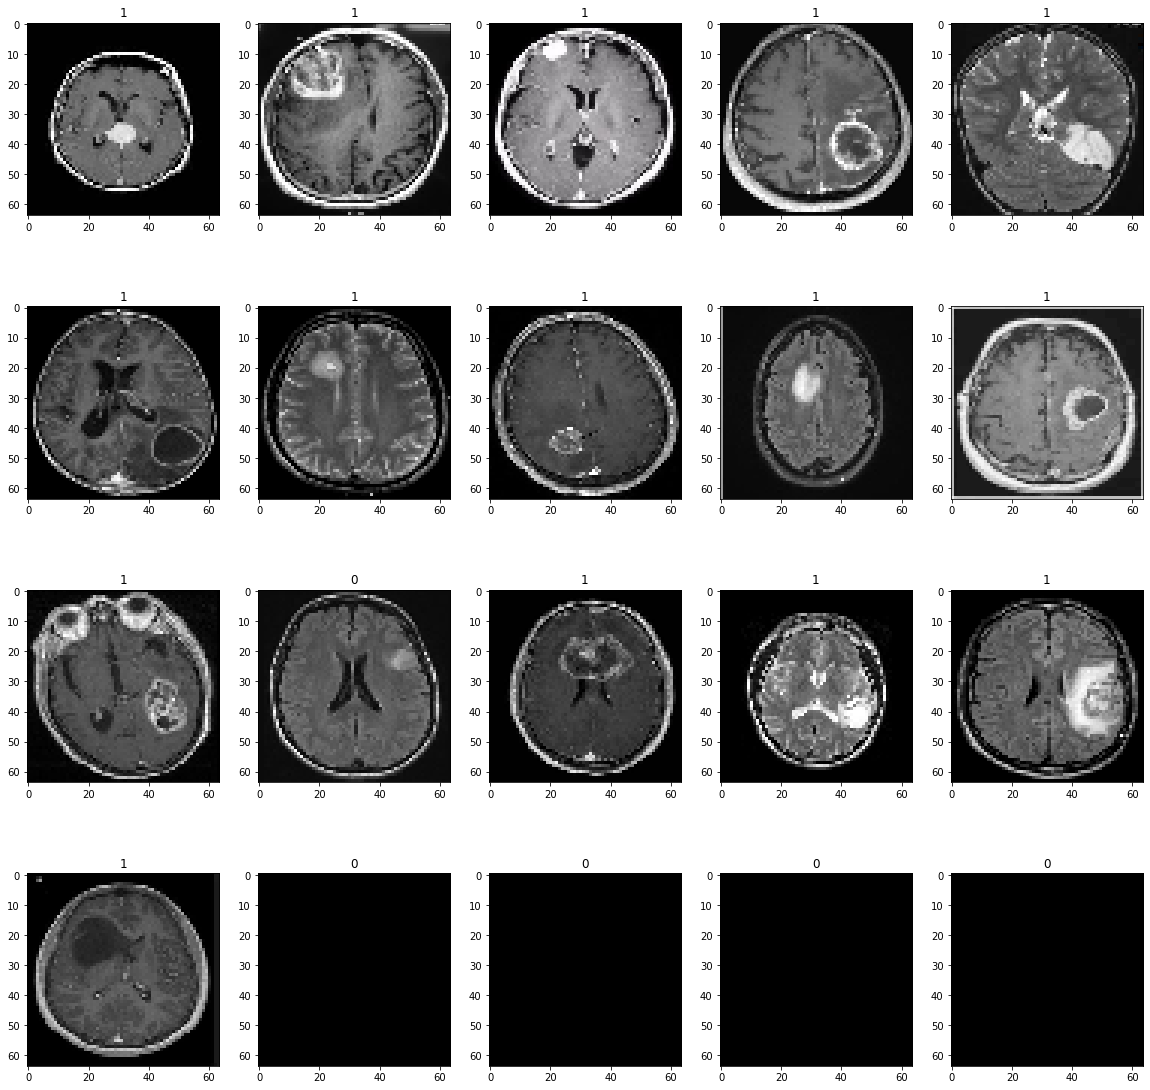

In [35]:
result=loaded_model.predict_classes(batch_holder)

fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(batch_holder):
  fig.add_subplot(4,5, i+1)
  plt.title(result[i][0])
  plt.imshow(img/255.)
  
plt.show()